# ph Classification

In [1]:
import numpy as np
import pandas as pd
from load_data import LoadData
from sklearn.utils import shuffle

In [3]:
df = LoadData(37).load_data()
df = shuffle(df)
df.head()

no image
no image
no image
no image
no image
no image


,blue,green,red,label
447,38,27,237,0
105,46,30,191,0
192,200,1,63,13
346,0,213,180,4
236,194,124,1,12


In [4]:
df.describe()

,blue,green,red,label
count,549.000000,549.000000,549.000000,549.000000
mean,88.347905,129.903461,118.918033,7.052823
std,74.704265,72.830494,90.738528,4.288303
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,68.000000,51.000000,3.000000
50%,67.000000,146.000000,85.000000,7.000000
75%,160.000000,189.000000,224.000000,11.000000
max,255.000000,255.000000,255.000000,14.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 447 to 157
Data columns (total 4 columns):
blue     549 non-null int32
green    549 non-null int32
red      549 non-null int32
label    549 non-null int32
dtypes: int32(4)
memory usage: 12.9 KB


In [6]:
pd.value_counts(df['label']).sort_values()

0     32
13    36
14    37
12    37
11    37
10    37
9     37
8     37
7     37
6     37
5     37
4     37
3     37
2     37
1     37
Name: label, dtype: int64

In [7]:
df.isna().sum()

blue     0
green    0
red      0
label    0
dtype: int64

## Plotting

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

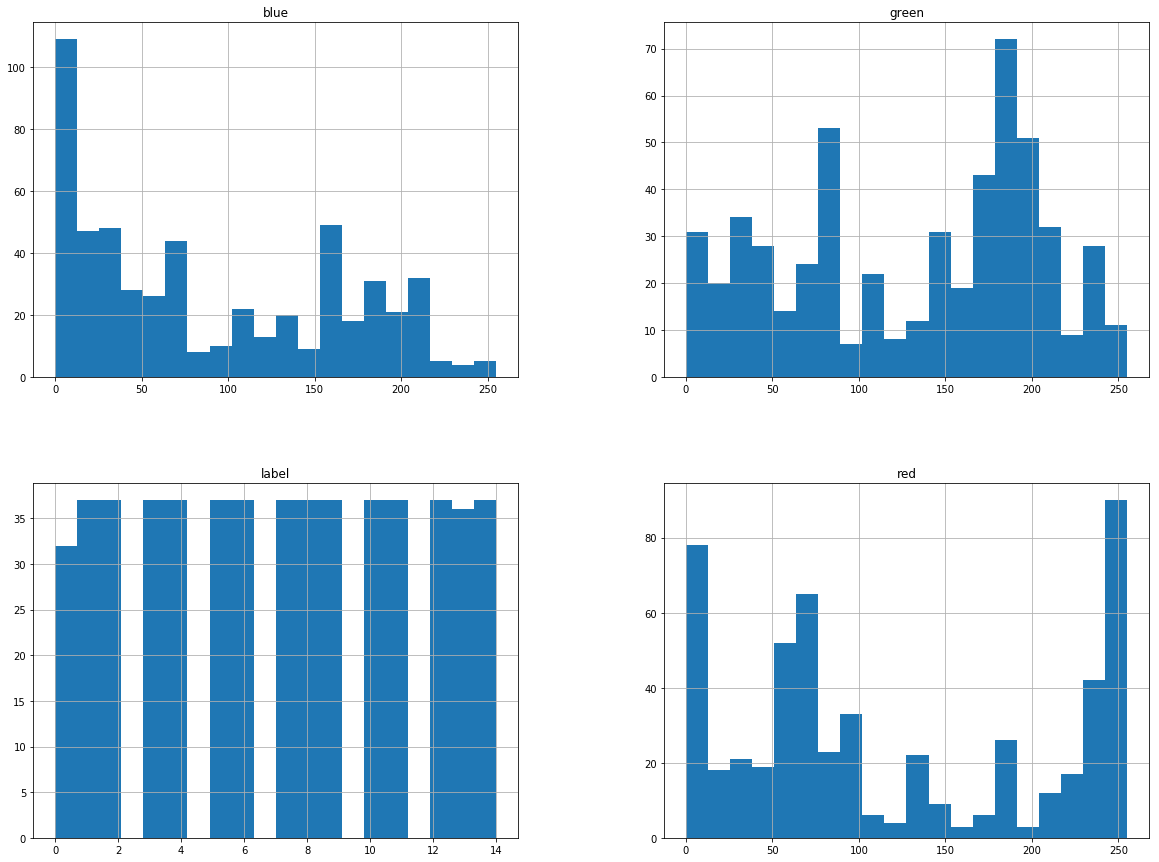

In [9]:
df.hist(bins=20, figsize=(20,15))
plt.show()

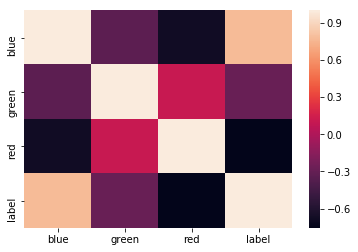

In [10]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.show()

In [11]:
corr_matrix['label'].sort_values(ascending=False)

label    1.000000
blue     0.775412
green   -0.284469
red     -0.755631
Name: label, dtype: float64

## Split data

In [12]:
X = df.drop('label', axis=1)
y = df['label']
X.shape, y.shape

((549, 3), (549,))

In [13]:
from sklearn.preprocessing import StandardScaler
after_scalar_data = StandardScaler().fit_transform(X)
after_scalar_data

array([[-0.67457757, -1.41420582,  1.30253002],
       [-0.56739098, -1.37297672,  0.79511655],
       [ 1.495951  , -1.77152472, -0.61681659],
       ...,
       [-0.28602616,  0.75719364, -0.51754004],
       [-0.31282281, -1.78526775,  1.32459148],
       [ 0.04893195,  0.53730509, -1.30072171]])

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((439, 3), (110, 3), (439,), (110,))

## Choose Model

### LogisticRegression

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
from sklearn.metrics import classification_report
log_reg_predict = log_reg.predict(x_test)
x = [i for i in range(15)]
log_reg_result = classification_report(y_test, log_reg_predict,labels=x)
print(log_reg_result)

             precision    recall  f1-score   support

          0       0.62      0.83      0.71         6
          1       0.50      0.50      0.50         4
          2       0.50      0.20      0.29         5
          3       0.21      0.75      0.33         4
          4       0.80      0.44      0.57         9
          5       1.00      0.10      0.18        10
          6       0.25      0.50      0.33         6
          7       0.43      0.25      0.32        12
          8       0.14      0.25      0.18         4
          9       1.00      0.77      0.87        13
         10       0.40      0.67      0.50         6
         11       1.00      0.17      0.29        12
         12       0.11      0.11      0.11         9
         13       0.31      0.80      0.44         5
         14       0.67      0.80      0.73         5

avg / total       0.61      0.44      0.43       110



### DecisionTreeClassfier

**without gridsearch**

In [17]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_class = DecisionTreeClassifier()
dec_tree_class.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
tree_predict = dec_tree_class.predict(x_test)
tree_result = classification_report(y_test, tree_predict,labels=x)
print(tree_result)

             precision    recall  f1-score   support

          0       1.00      0.50      0.67         6
          1       0.44      1.00      0.62         4
          2       1.00      0.60      0.75         5
          3       0.50      0.75      0.60         4
          4       0.80      0.44      0.57         9
          5       0.64      0.70      0.67        10
          6       0.50      0.67      0.57         6
          7       0.80      0.67      0.73        12
          8       0.50      0.25      0.33         4
          9       0.91      0.77      0.83        13
         10       0.44      0.67      0.53         6
         11       0.90      0.75      0.82        12
         12       0.78      0.78      0.78         9
         13       0.36      0.80      0.50         5
         14       1.00      0.60      0.75         5

avg / total       0.75      0.67      0.68       110



**with gridsearch**

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid_tree = [
    {'max_depth':[None,1,2,5,10],'criterion':['gini','entropy']},
    {'splitter':['best','random']}
]

In [21]:
tree_grid = GridSearchCV(dec_tree_class, param_grid_tree,scoring='accuracy')
tree_grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [None, 1, 2, 5, 10], 'criterion': ['gini', 'entropy']}, {'splitter': ['best', 'random']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [22]:
tree_grid.best_params_

{'splitter': 'random'}

### cross_val_score & cross_val_predict

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(dec_tree_class, x_train,y_train, cv=4, scoring='accuracy')

array([0.79130435, 0.83636364, 0.67889908, 0.6952381 ])

In [24]:
from sklearn.model_selection import cross_val_predict
y_pred_tree = cross_val_predict(dec_tree_class, x_train, y_train, cv=3)

In [25]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train, y_pred_tree)

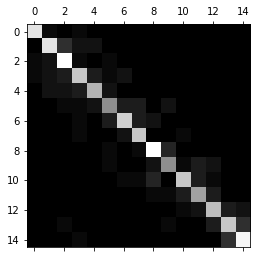

In [26]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

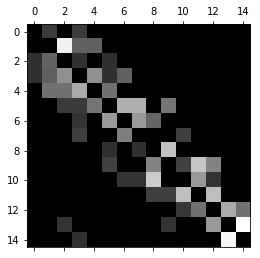

In [27]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums
np.fill_diagonal(norm_conf_matrix, 0)
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.show()

### GradientBoostingClassifier

**without randomgridsearch**

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier()
grad_boost.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [29]:
grad_predict = grad_boost.predict(x_test)
grad_result = classification_report(y_test, grad_predict,labels=x)
print(grad_result)

             precision    recall  f1-score   support

          0       0.60      0.50      0.55         6
          1       0.50      1.00      0.67         4
          2       0.75      0.60      0.67         5
          3       0.38      0.75      0.50         4
          4       0.88      0.78      0.82         9
          5       0.80      0.80      0.80        10
          6       0.80      0.67      0.73         6
          7       0.82      0.75      0.78        12
          8       0.50      0.25      0.33         4
          9       0.90      0.69      0.78        13
         10       0.33      0.67      0.44         6
         11       0.89      0.67      0.76        12
         12       0.83      0.56      0.67         9
         13       0.67      0.80      0.73         5
         14       0.67      0.80      0.73         5

avg / total       0.74      0.69      0.70       110



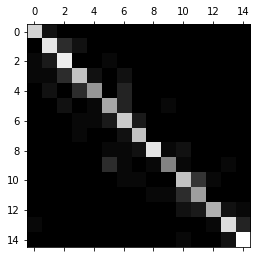

In [30]:
y_pred_grad = cross_val_predict(grad_boost, x_train, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_pred_grad)
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()